## 任务说明

- 学习主题：作者关联（数据建模任务），对论文作者关系进行建模，统计最常出现的作者关系；
- 学习内容：构建作者关系图，挖掘作者关系
- 学习成果：论文作者知识图谱、图关系挖掘

## 数据处理步骤

将作者列表进行处理，并完成统计。具体步骤如下：

- 将论文第一作者与其他作者（论文非第一作者）构建图；
- 使用图算法统计图中作者与其他作者的联系；

## 社交网络分析

图是复杂网络研究中的一个重要概念。Graph是用**点**和**线**来刻画离散事物集合中的每对事物间以某种方式相联系的数学模型。Graph在现实世界中随处可见，如交通运输图、旅游图、流程图等。利用图可以描述现实生活中的许多事物，如用点可以表示交叉口，点之间的连线表示路径，这样就可以轻而易举的描绘出一个交通运输网络。

### 图类型

- 无向图，忽略了两节点间边的方向。

- 指有向图，考虑了边的有向性。

- 多重无向图，即两个结点之间的边数多于一条，又允许顶点通过同一条边和自己关联。

### 图统计指标

- 度：是指和该节点相关联的边的条数，又称关联度。对于有向图，节点的入度 是指进入该节点的边的条数；节点的出度是指从该节点出发的边的条数；

- 迪杰斯特拉路径：.从一个源点到其它各点的最短路径，可使用迪杰斯特拉算法来求最短路径；

- 连通图：在一个无向图 G 中，若从顶点i到顶点j有路径相连，则称i和j是连通的。如果 G 是有向图，那么连接i和j的路径中所有的边都必须同向。如果图中任意两点都是连通的，那么图被称作连通图。如果此图是有向图，则称为强连通图。

对于其他图算法，可以在networkx和igraph两个库中找到。

## 具体代码以及讲解

首先读取我们想要的数据：

In [1]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [2]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json', 
                     ['id', 'authors_parsed','categories','update_date'])


In [3]:
# 选择类别为cs.CV下面的论文
data["year"] = pd.to_datetime(data["update_date"]).dt.year #将update_date从例如2019-02-20的str变为datetime格式，并提取处year
del data["update_date"] #删除 update_date特征，其使命已完成


In [4]:
data = data[(data['categories'].apply(lambda x: 'cs.CV' in x)) & (data['year'].apply(lambda x: x==2019))]
data.reset_index(drop=True, inplace=True) #重新编号
data.describe()

,year
count,11168.0
mean,2019.0
std,0.0
min,2019.0
25%,2019.0
50%,2019.0
75%,2019.0
max,2019.0


创建作者链接的无向图：

In [5]:
import networkx as nx 
# 创建无向图
G = nx.Graph()

# 只用五篇论文进行构建
for row in data.iloc[:500].itertuples():
    authors = row[2]
    authors = [' '.join(x[:-1]) for x in authors]
    print(authors)
    
    # 第一个作者 与 其他作者链接
    for author in authors[1:]:
        G.add_edge(authors[0],author) #　添加节点２，３并链接２３节点

['Pal Mahesh']
['Mokhov Serguei A. ', 'Sinclair Stephen ', 'Clément Ian ', 'Nicolacopoulos Dimitrios ']
['Aholt Chris', 'Sturmfels Bernd', 'Thomas Rekha']
['Ronda José I.', 'Valdés Antonio', 'Gallego Guillermo']
['Guha Tanaya', 'Ward Rabab K.']
['Olaizola Igor G.', 'Quartulli Marco', 'Florez Julian', 'Sierra Basilio']
['Xie Xiaohua', 'Xu Kai', 'Mitra Niloy J.', 'Cohen-Or Daniel', 'Chen Baoquan']
['Guha Tanaya', 'Nezhadarya Ehsan', 'Ward Rabab K']
['Gao Fei', 'Tao Dacheng', 'Gao Xinbo', 'Li Xuelong']
['Sun Yuli', 'Tao Jinxu', 'Liu Conggui']
['Sun Yuli', 'Tao Jinxu']
['Soorma Neha ', 'Singh Jaikaran ', 'Tiwari Mukesh ']
['Poling Bryan', 'Lerman Gilad', 'Szlam Arthur']
['Chung Moo K.', 'Hanson Jamie L.', 'Ye Jieping', 'Davidson Richard J.', 'Pollak Seth D.']
['Li Junhua', 'Struzik Zbigniew', 'Zhang Liqing', 'Cichocki Andrzej']
['Gilani Syed Zulqarnain', 'Mian Ajmal', 'Shafait Faisal', 'Reid Ian']
['Li Junhua', 'Li Chao', 'Cichocki Andrzej']
['van Gennip Yves', 'Athavale Prashant', 'Gilles

In [6]:
authors

['Yi Kai', 'Jian Zhiqiang', 'Chen Shitao', 'Zheng Nanning']

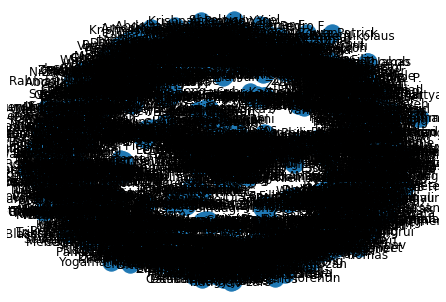

In [7]:
# 将作者关系图进行绘制：
nx.draw(G, with_labels=True)

In [8]:
try:
    print(nx.dijkstra_path(G, 'Balázs C.', 'Ziambaras Eleni'))
except:
    print('No path')

No path


如果我们500片论文构建图，则可以得到更加完整作者关系，并选择最大联通子图进行绘制，折线图为子图节点度值。

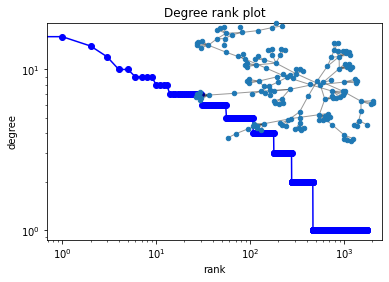

In [9]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)

plt.loglog(degree_sequence, "b-", marker="o")
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

pos = nx.spring_layout(Gcc)
plt.axis("off")
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()